### Step 1: Import required libraries 

In [120]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load the data

In [60]:
df = pd.read_csv('Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin   
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API  \
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits   
0      Olark Chat           No          No          0          0.0  \
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...   
0                            0                   0.0  ...  \
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City   
0                        No          Select  Select  \
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index   
0                   02.Medium                  02.Medium  \
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score   
0                        15.0                       15.0  \
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque   
0                                       No  \
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [62]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website   
count    9240.000000  9240.000000  9103.000000                  9240.000000  \
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score   
count           9103.000000                  5022.000000  \
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Step 3: Data Preparation


### 3.1 Missing value imputation

In [63]:
#Remove Prospect ID and Lead Number as they have no significance for our analysis
df = df.drop(['Prospect ID', 'Lead Number'], axis= 1)

In [64]:
#Convert all 'XNA' and 'XAP' values into nan's
df = df.replace('XNA', np.nan)
df = df.replace('XAP', np.nan)


In [65]:
#Percentage of null values in all columns of application data
df.isna().mean() * 100


Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [66]:
#Drop columns that have missing values of more that 20%
application_missing = pd.DataFrame(df.isna().mean() * 100)
print(f'Number of columns dropped: {application_missing[application_missing[0] > 20].shape[0]}')
df = df.drop(application_missing[application_missing[0] > 20].index, axis = 1)

Number of columns dropped: 11


In [67]:
#Drop rows that have missing values less than 1%
cols_to_drop_rows = application_missing[(application_missing[0] > 0) & (application_missing[0] < 1)].index
df = df.dropna(subset = cols_to_drop_rows)

In [68]:
#Impute remaining missing values using median (for numeric columns) or mode (for categorical columns)
for col in df.columns:
  if df[col].dtype == 'object':
    df.loc[:, col].fillna(df[col].mode()[0], inplace = True)
  else:
    df.loc[:, col].fillna(df[col].median(), inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9204 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9204 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9204 non-null   object 
 3   Do Not Call                               9204 non-null   object 
 4   Converted                                 9204 non-null   int64  
 5   TotalVisits                               9204 non-null   float64
 6   Total Time Spent on Website               9204 non-null   int64  
 7   Page Views Per Visit                      9204 non-null   float64
 8   Last Activity                             9204 non-null   object 
 9   Specialization                            9204 non-null   object 
 10  Search                                   

### 3.2 Handling outliers

In [70]:
#split columns into numeric and categorical variables
numeric = [x for x in df.columns if df[x].dtype != 'object']
mul_categorical = [x for x in df.columns if df[x].dtype == 'object' and len(df[x].value_counts()) > 2]
binary_categorical = [x for x in df.columns if df[x].dtype == 'object' and x not in mul_categorical]

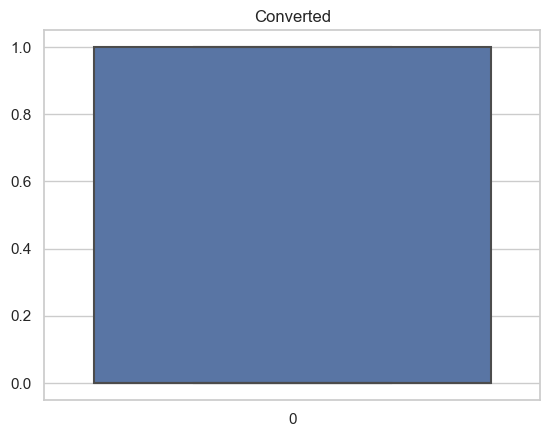

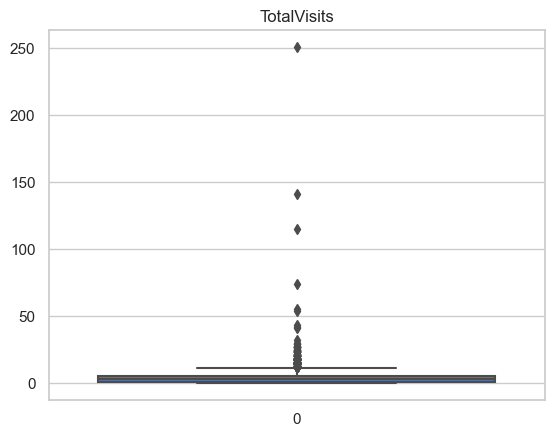

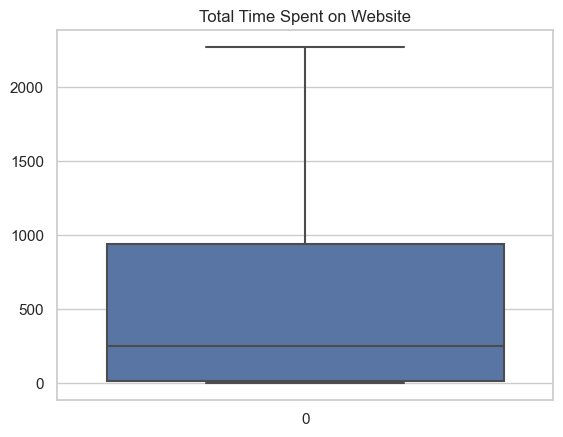

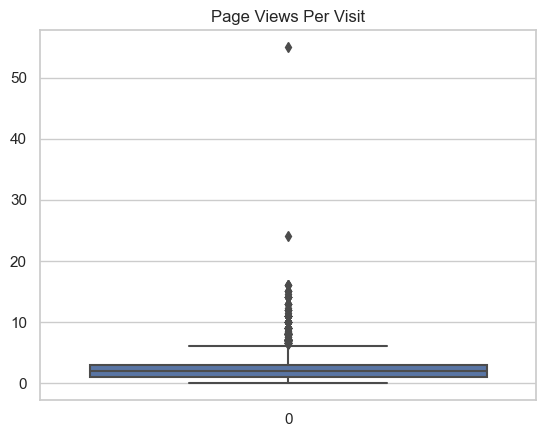

In [71]:
for col in numeric:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

Lets keep the outliers

### 3.3 Exploratory Data Analysis (EDA)

In [72]:
df.describe()

Converted  TotalVisits  Total Time Spent on Website   
count  9204.000000  9204.000000                  9204.000000  \
mean      0.383746     3.449587                   489.005541   
std       0.486324     4.824662                   547.980340   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    14.000000   
50%       0.000000     3.000000                   250.000000   
75%       1.000000     5.000000                   938.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9204.000000  
mean               2.364923  
std                2.145999  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

Univariate Analysis

<Axes: xlabel='Converted'>

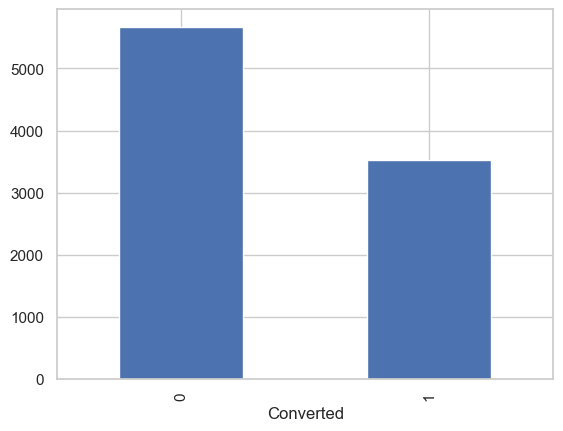

In [73]:
df['Converted'].value_counts().plot.bar()

In [74]:
def generate_uni_plot(nrows, ncols, df):
    sns.set(style="whitegrid")

    # Set up the matplotlib figure
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
    fig.subplots_adjust(hspace=0.5)

    # Flatten the axes for easier iteration
    axes = axes.flatten()

    # Loop through the column names and create bar plots or distplots
    for i in range(min(len(df.columns), nrows * ncols)):
        # Select the current axis
        ax = axes[i]

        # Check if the column is categorical or numeric
        #if pd.api.types.is_categorical_dtype(df.iloc[:, i]):

        if pd.api.types.is_numeric_dtype(df.iloc[:, i]):
            #Use distplot for numeric columns
            sns.histplot(df.iloc[:, i], kde=True, ax=ax)
            continue

         # Else Use value_counts to get counts and then plot
        value_counts = df.iloc[:, i].value_counts()
        value_counts.plot(kind='bar', ax=ax)

        # Set the title
        ax.set_title(df.columns[i], fontsize=12)

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plots
    plt.show()


In [75]:
pd.api.types.is_categorical_dtype(df.iloc[:, 5])

False

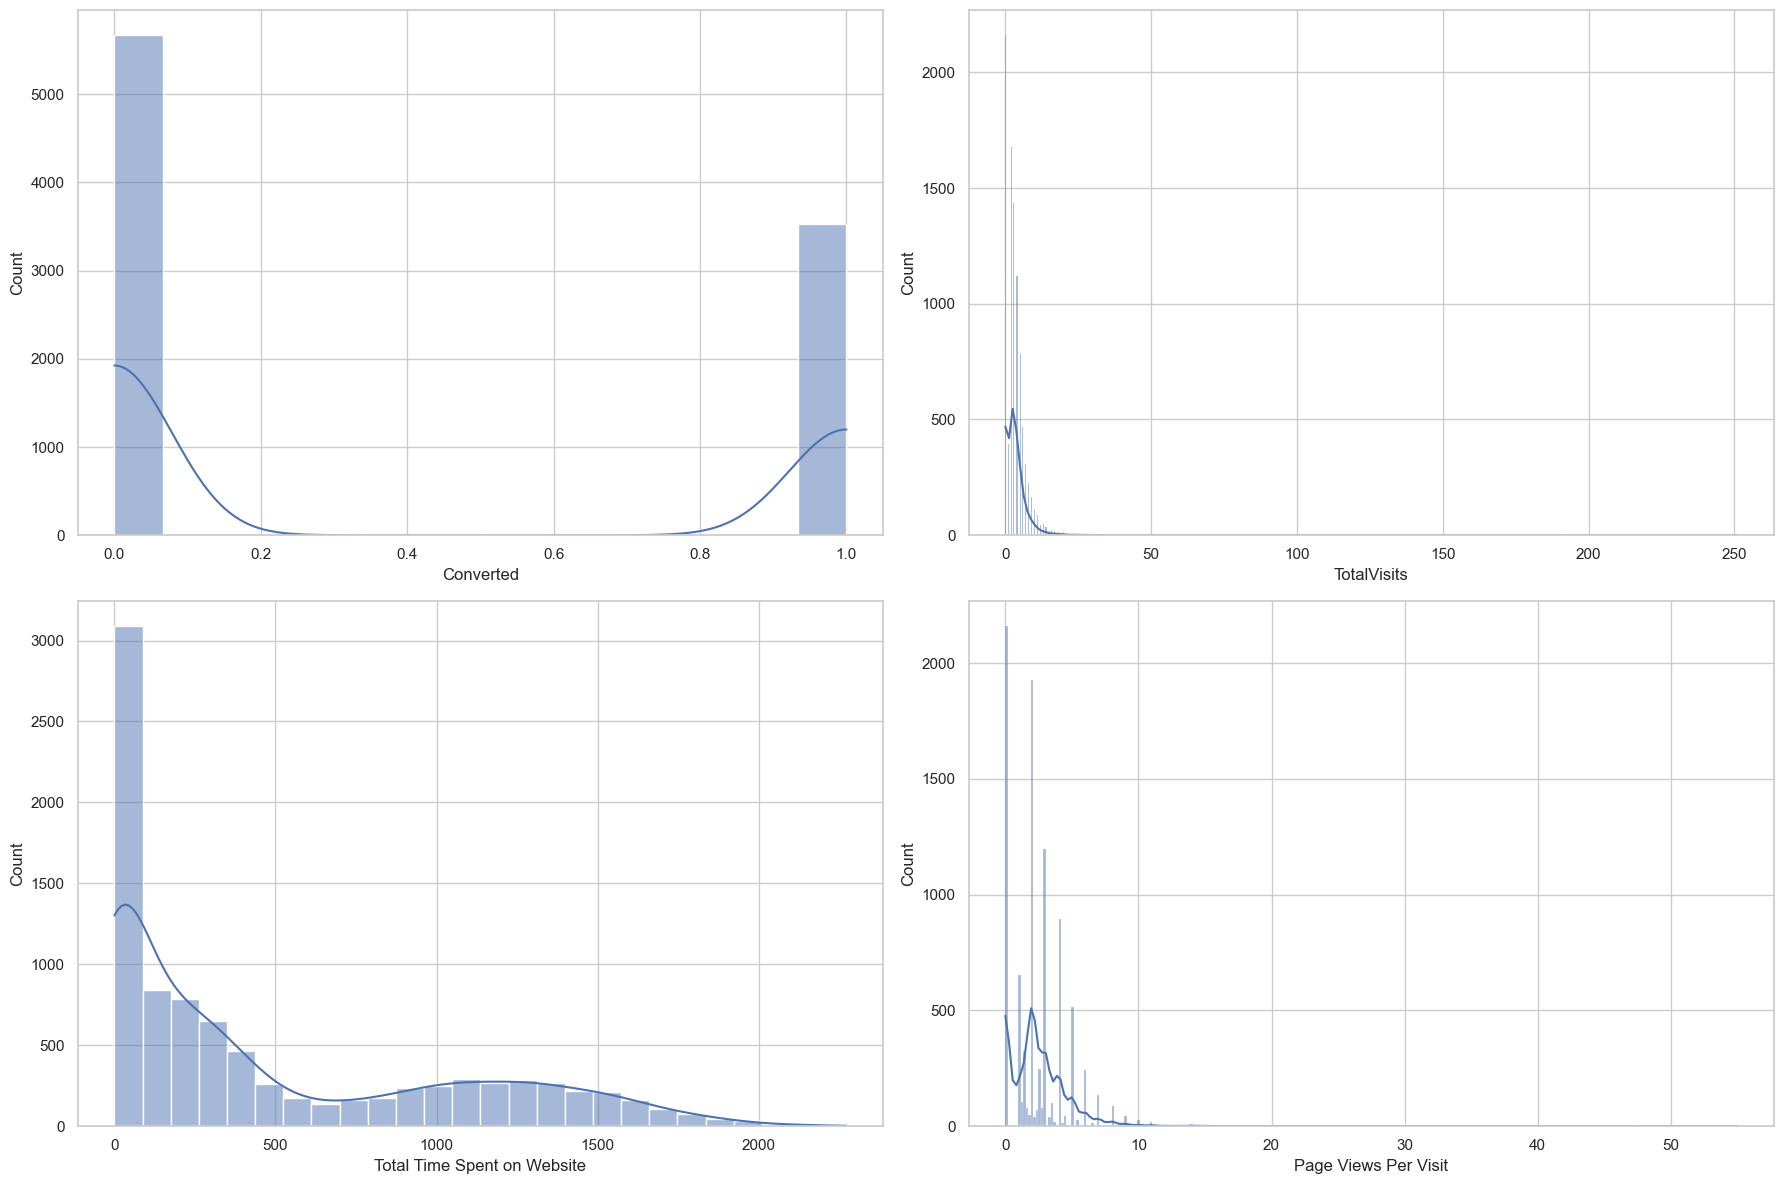

In [76]:
generate_uni_plot(2, 2, df[numeric])

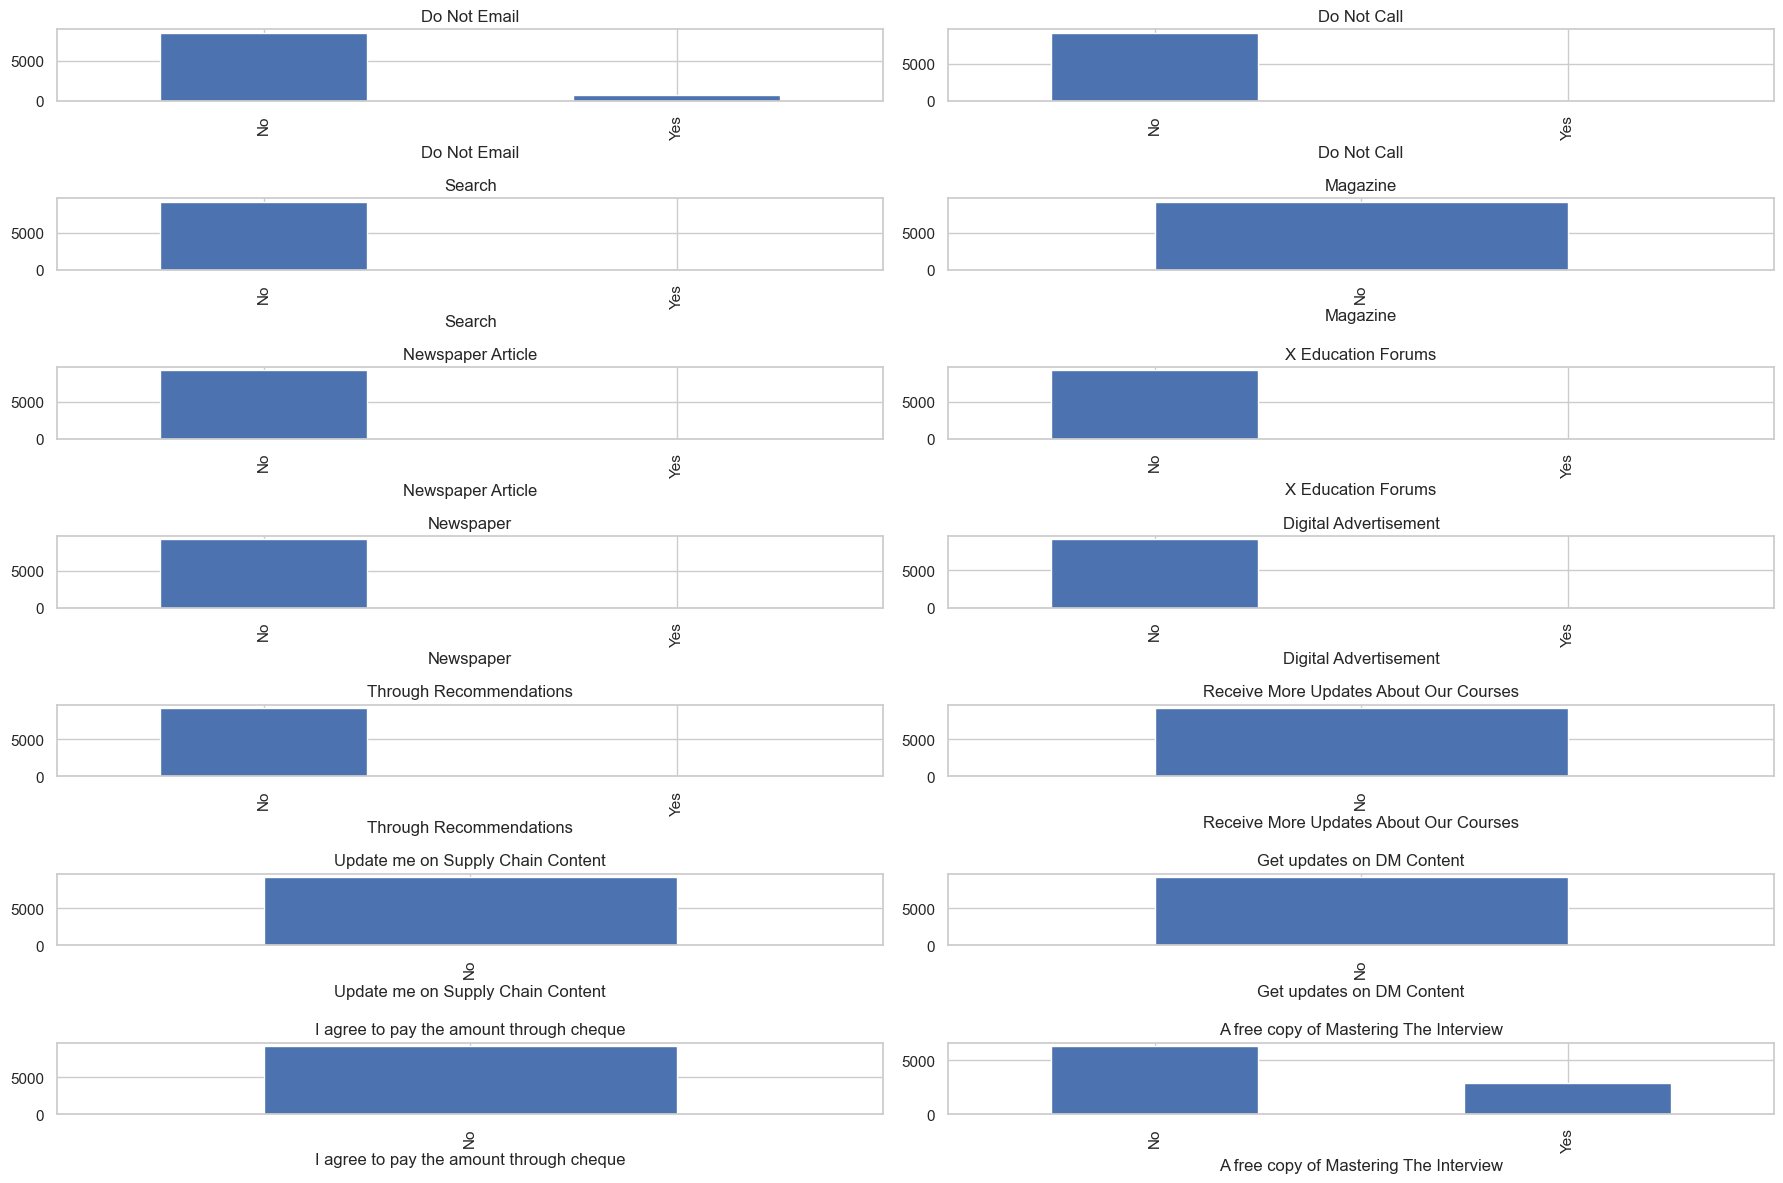

In [77]:
generate_uni_plot(7, 2, df[binary_categorical])

We see that for some categories there exist no 'yes' values and hence pandas assumes that these varibles have only one category.

Lets fix this

In [78]:
df['Update me on Supply Chain Content'][0] = 'Yes'
df['I agree to pay the amount through cheque'][0] = 'Yes'
df['Get updates on DM Content'][0] = 'Yes'
df['Receive More Updates About Our Courses'][0] = 'Yes'
df['Magazine'][0] = 'Yes'


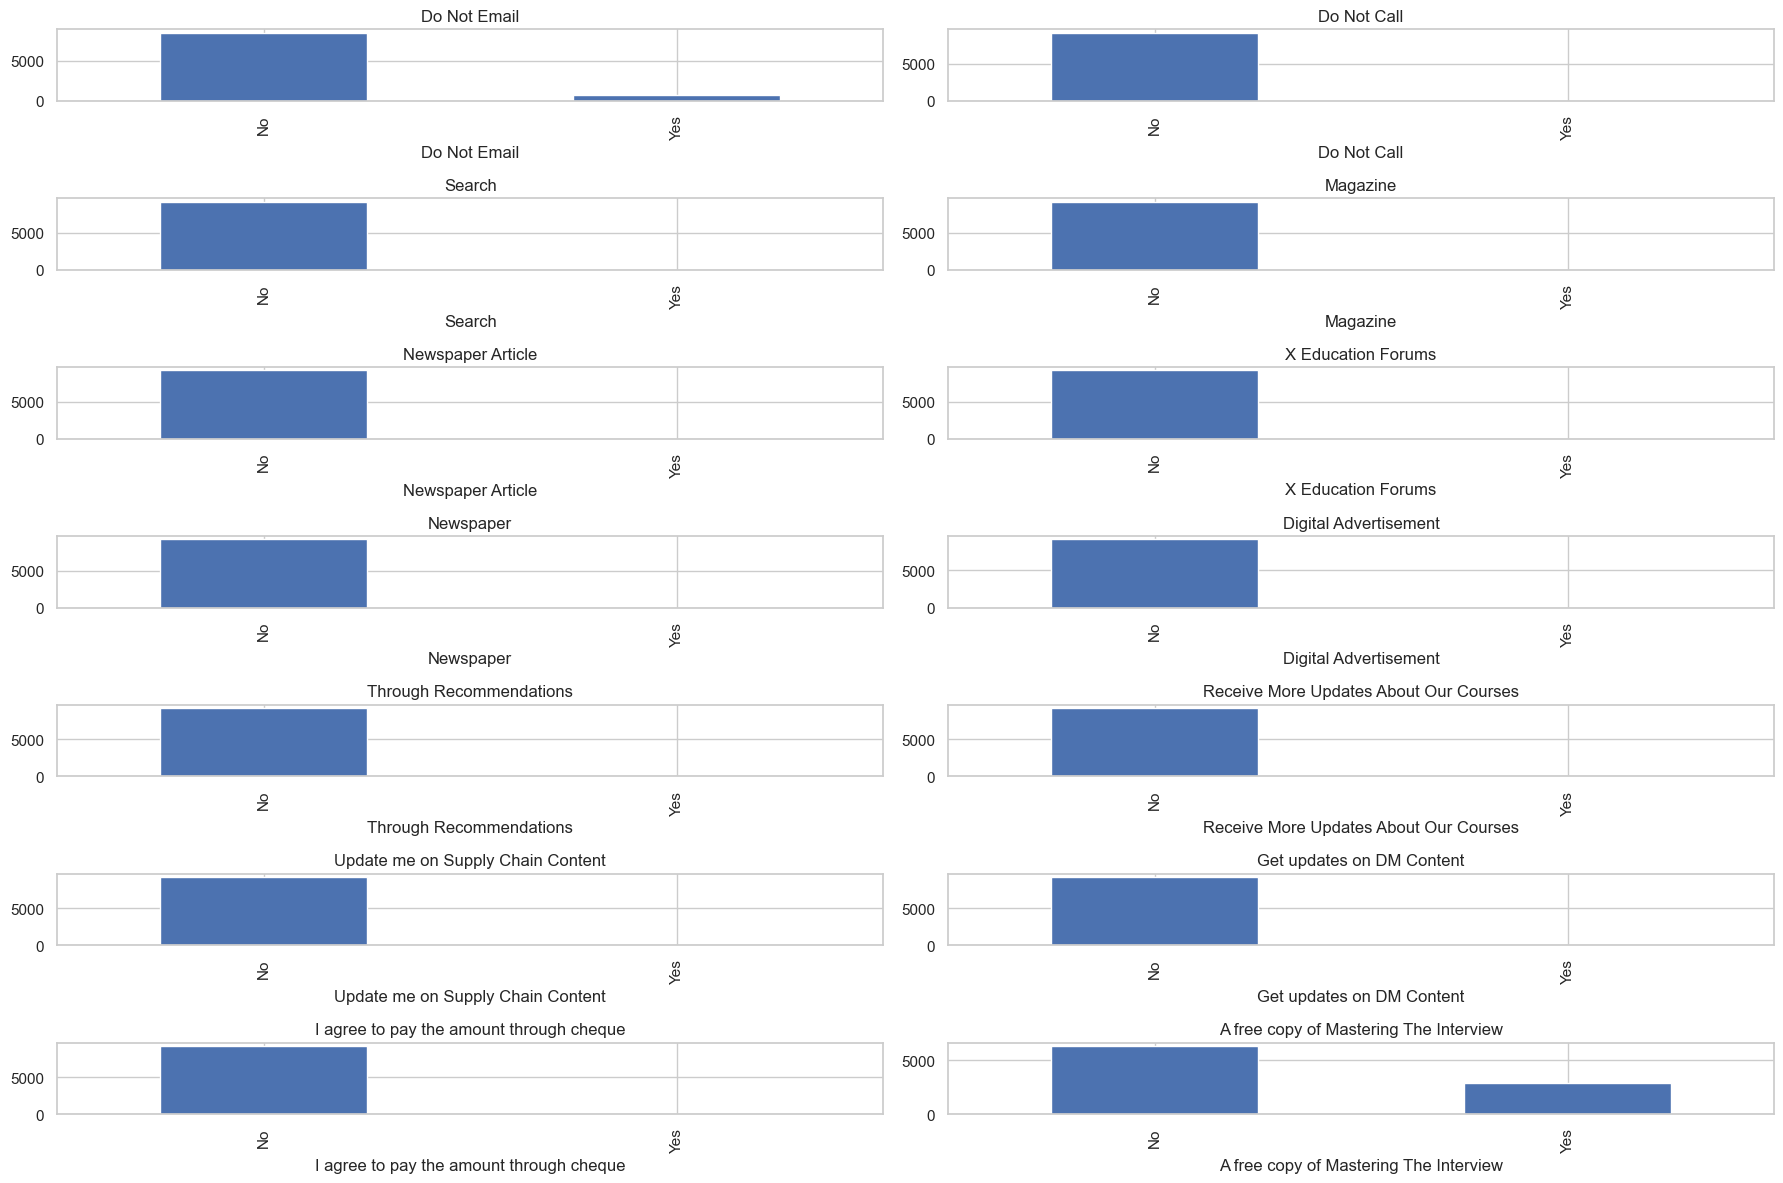

In [79]:
generate_uni_plot(7, 2, df[binary_categorical])

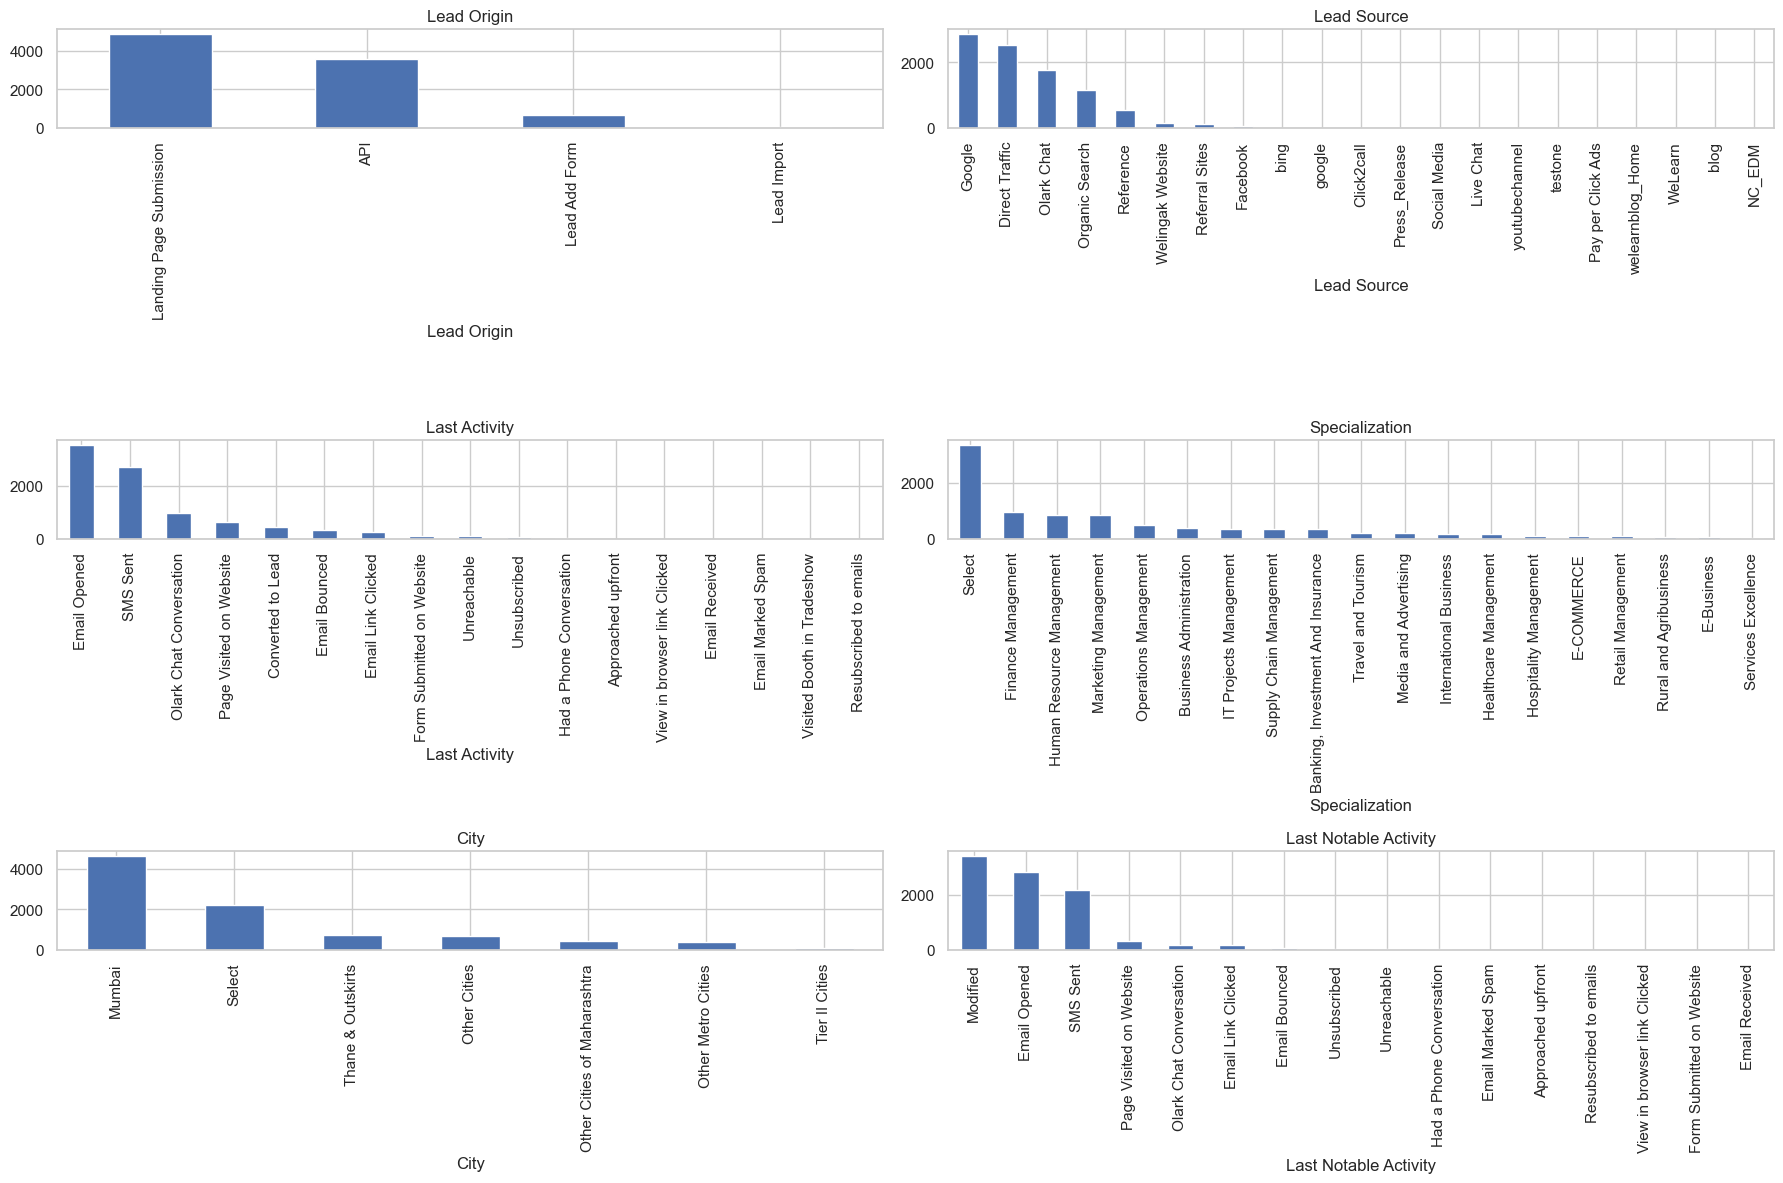

In [80]:
generate_uni_plot(3, 2, df[mul_categorical])

Bivariate Analysis

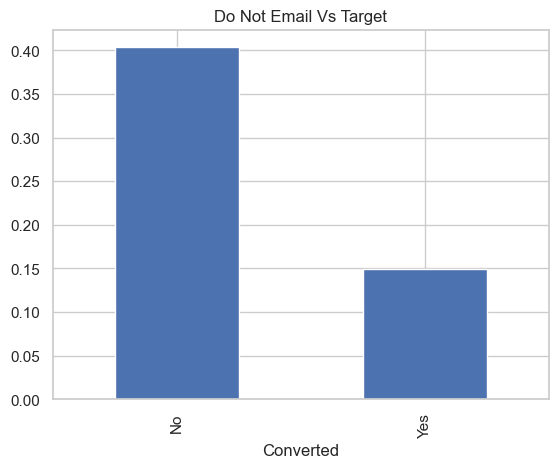

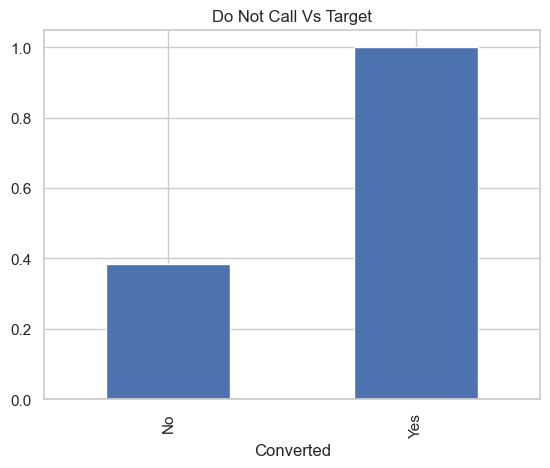

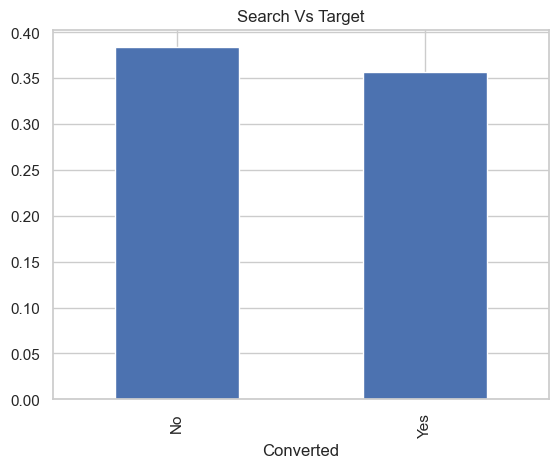

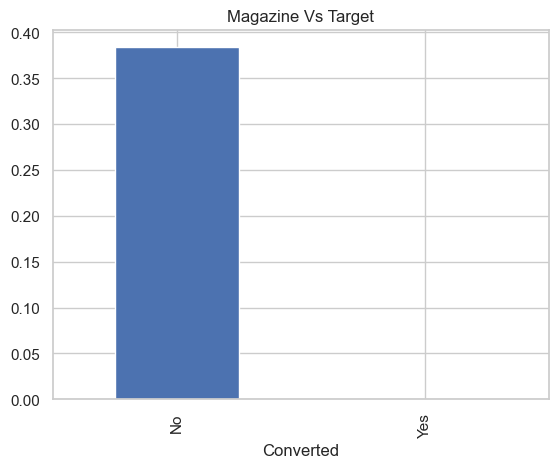

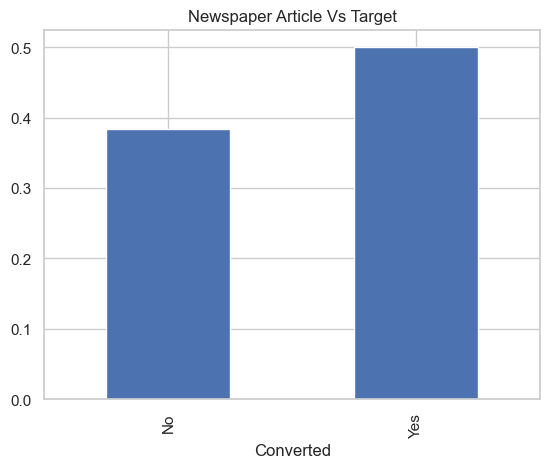

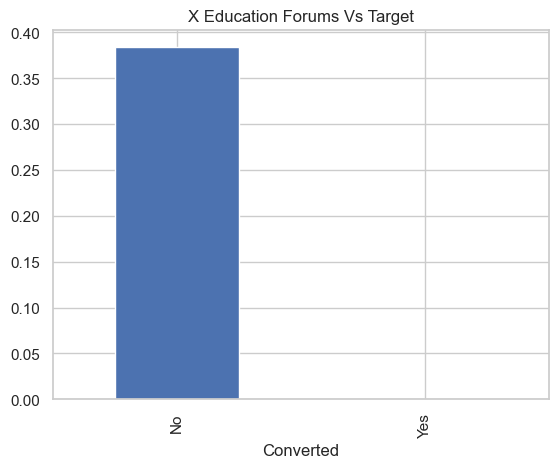

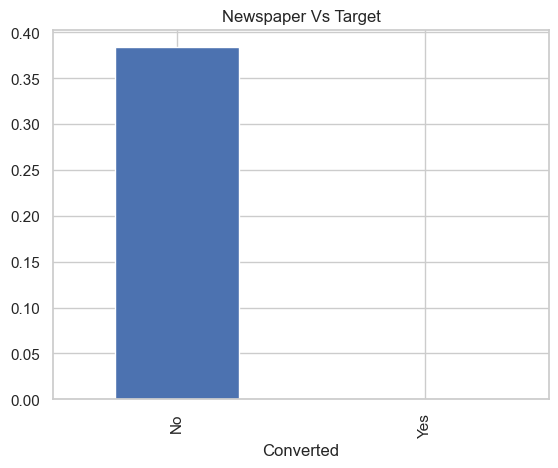

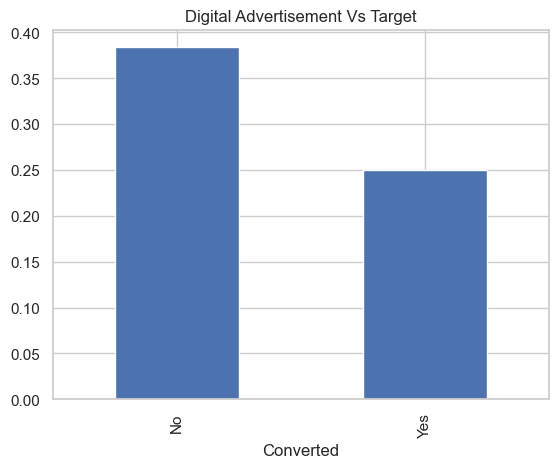

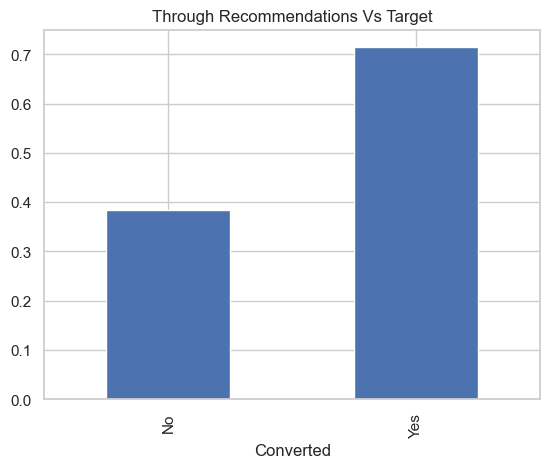

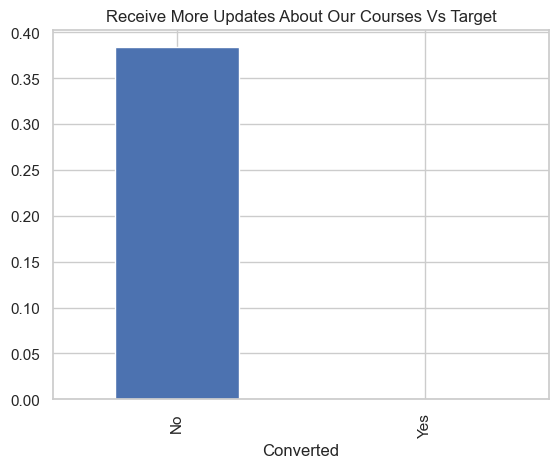

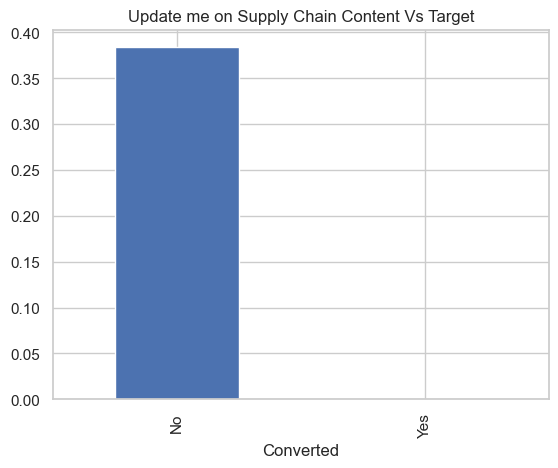

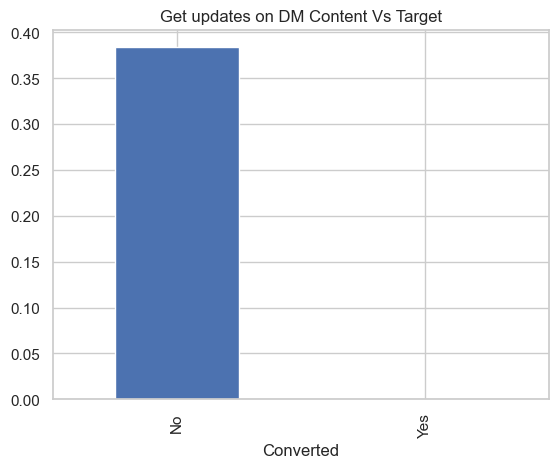

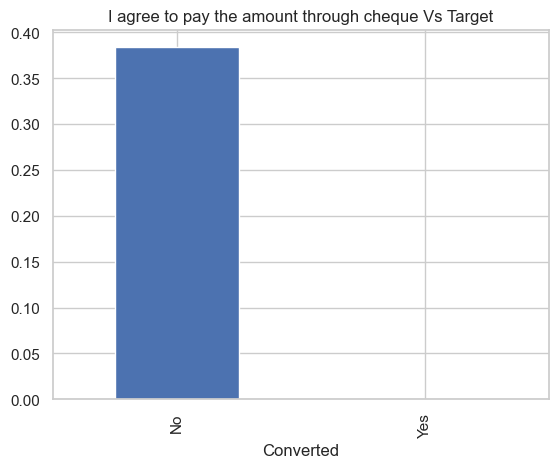

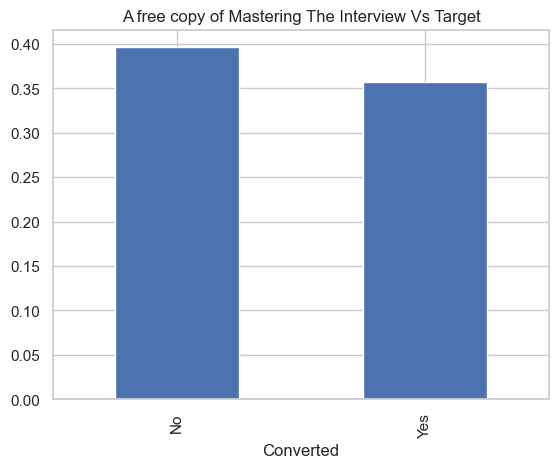

In [81]:
for i in binary_categorical:
    df.groupby(i)['Converted'].mean().plot.bar()
    plt.title(f'{i} Vs Target')
    plt.xlabel('Converted')
    plt.show()

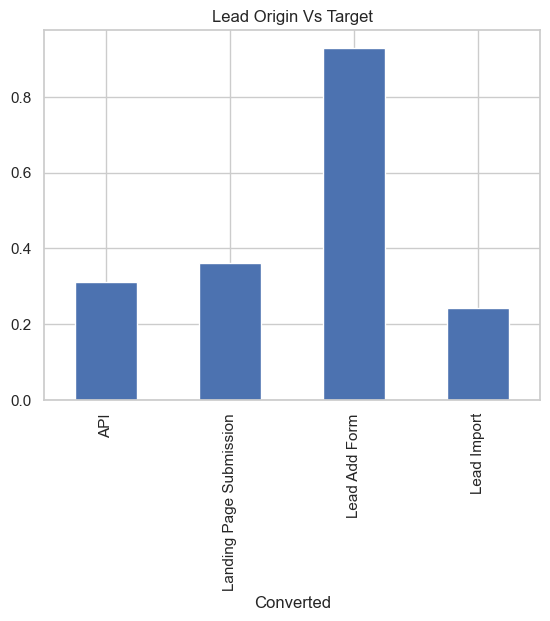

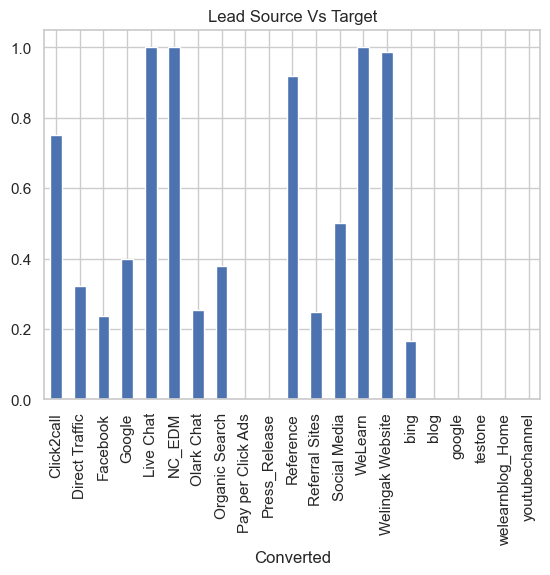

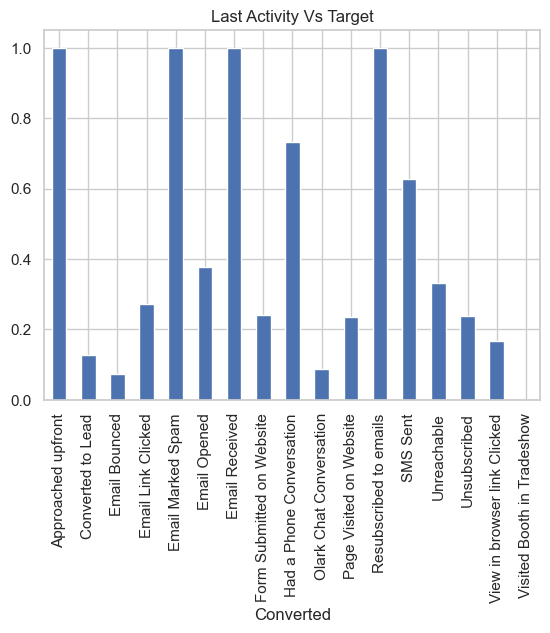

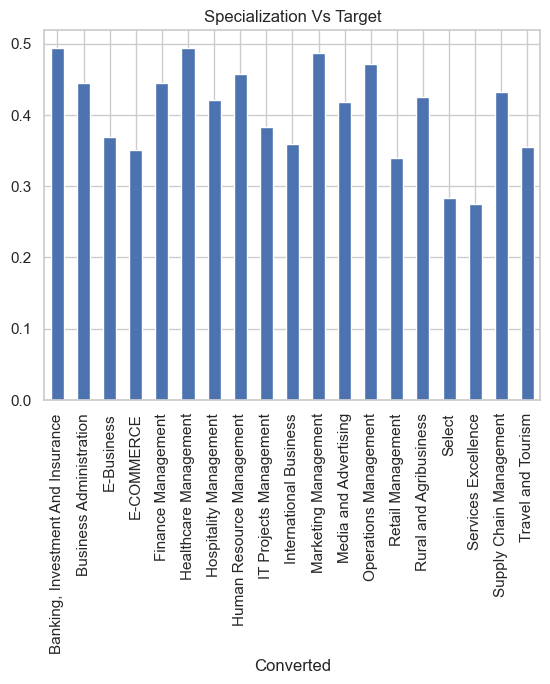

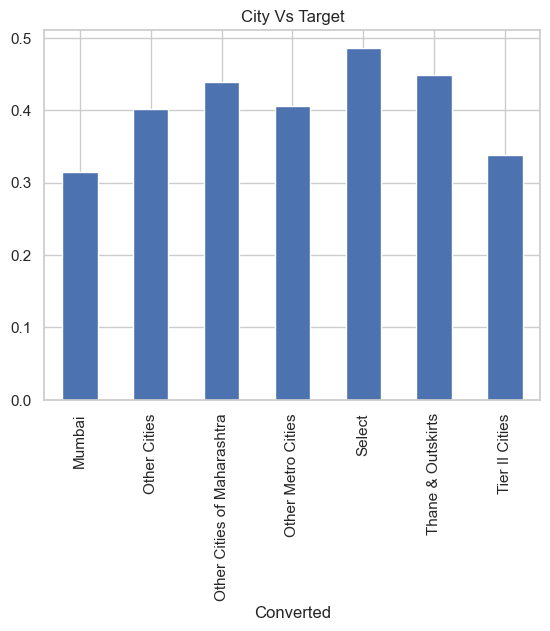

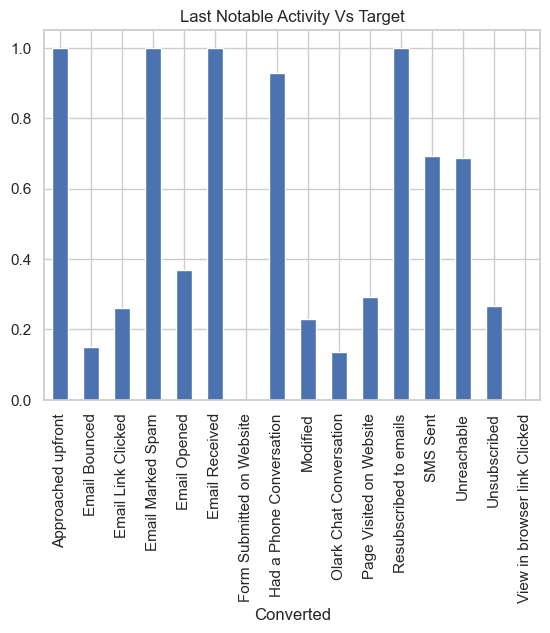

In [82]:
for i in mul_categorical:
    df.groupby(i)['Converted'].mean().plot.bar()
    plt.title(f'{i} Vs Target')
    plt.xlabel('Converted')
    plt.show()

We see that some people have chosen the category 'Select' for City and 'Specialization'. These are as good as missing values

In [83]:
df['Specialization'].value_counts(normalize=True)

Specialization
Select                               0.364189
Finance Management                   0.105715
Human Resource Management            0.092025
Marketing Management                 0.090939
Operations Management                0.054542
Business Administration              0.043785
IT Projects Management               0.039765
Supply Chain Management              0.037918
Banking, Investment And Insurance    0.036723
Travel and Tourism                   0.022056
Media and Advertising                0.022056
International Business               0.019339
Healthcare Management                0.017166
Hospitality Management               0.012386
E-COMMERCE                           0.012060
Retail Management                    0.010865
Rural and Agribusiness               0.007931
E-Business                           0.006193
Services Excellence                  0.004346
Name: proportion, dtype: float64

In [84]:
df['City'].value_counts(normalize=True)

City
Mumbai                         0.504129
Select                         0.240982
Thane & Outskirts              0.081595
Other Cities                   0.074533
Other Cities of Maharashtra    0.049544
Other Metro Cities             0.041178
Tier II Cities                 0.008040
Name: proportion, dtype: float64

Since the 'Select' Categories are more that 20% of the data in those columns, the columns are dropped

In [85]:
df = df.drop(['Specialization', 'City'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9204 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9204 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9204 non-null   object 
 3   Do Not Call                               9204 non-null   object 
 4   Converted                                 9204 non-null   int64  
 5   TotalVisits                               9204 non-null   float64
 6   Total Time Spent on Website               9204 non-null   int64  
 7   Page Views Per Visit                      9204 non-null   float64
 8   Last Activity                             9204 non-null   object 
 9   Search                                    9204 non-null   object 
 10  Magazine                                 

#### Converting some binary variables (Yes/No) to 0/1

In [86]:
# List of variables to map
varlist = []
for i in df:
    if df[i][0] == 'Yes' or df[i][0] == 'No':
        varlist.append(i)

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [87]:
df1 = df.drop(['Lead Origin',
 'Lead Source',
 'Last Activity','Last Notable Activity'], axis = 1)

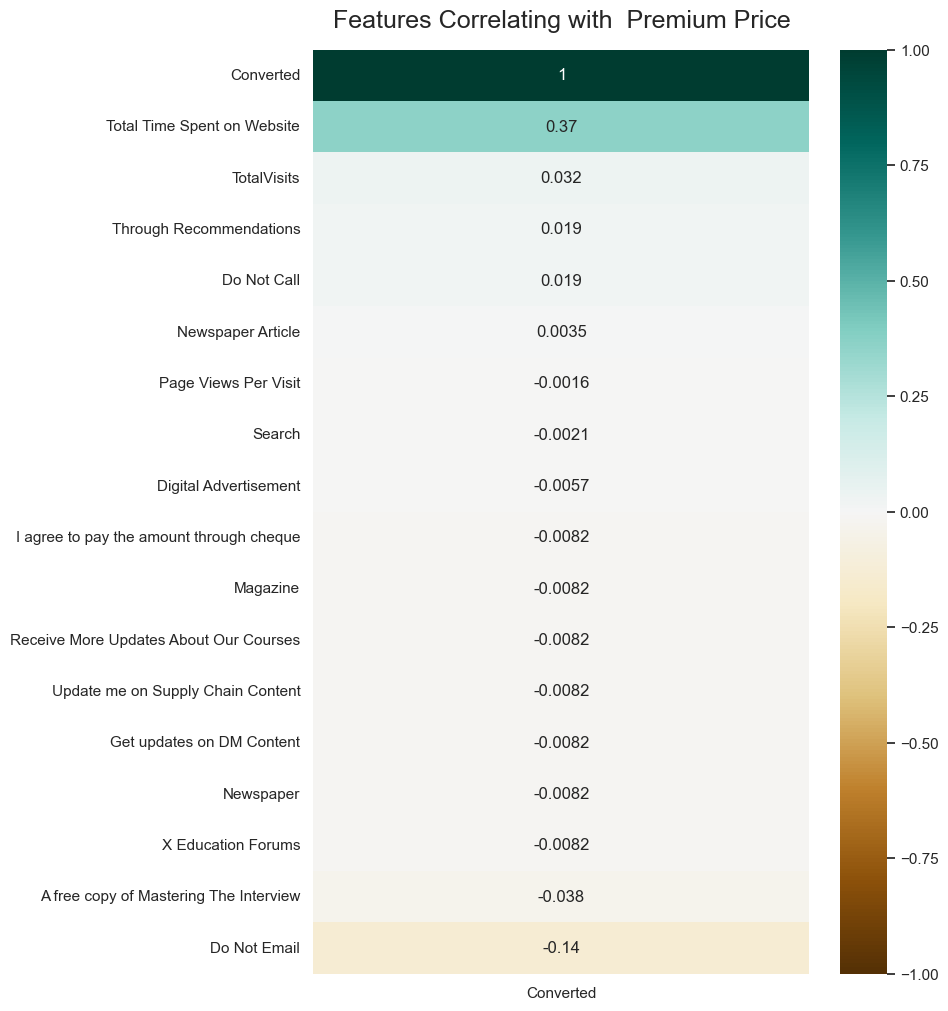

In [88]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['Converted']].sort_values(by='Converted', 
                                                                     ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with  Premium Price', fontdict={'fontsize':18}, pad=16);

### For categorical variables with multiple levels, create dummy features (one-hot encoded)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9204 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9204 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9204 non-null   int64  
 3   Do Not Call                               9204 non-null   int64  
 4   Converted                                 9204 non-null   int64  
 5   TotalVisits                               9204 non-null   float64
 6   Total Time Spent on Website               9204 non-null   int64  
 7   Page Views Per Visit                      9204 non-null   float64
 8   Last Activity                             9204 non-null   object 
 9   Search                                    9204 non-null   int64  
 10  Magazine                                 

In [90]:
obj_lis = []
for i in df:
    if df[i].dtype == 'O':
        obj_lis.append(i)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[obj_lis], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [91]:
df.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call   
0                      API      Olark Chat             0            0  \
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit   
0          0          0.0                            0                   0.0  \
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity  Search  ...   
0  Page Visited on Website       0  ...  \
1             Email Opened       0  ...   
2             Email Opened       0  ...   
3              Unreachable       0  ...   
4        Converted to Lead       0  ...   

   Last Notable Activity_Form Submitted on Website   
0                                            False  \
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Last Notable Activity_Had a Phone Conversation   
0                                           False  \
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Last Notable Activity_Modified   
0                            True  \
1                           False   
2                           False   
3                            True   
4                            True   

   Last Notable Activity_Olark Chat Conversation   
0                                          False  \
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website   
0                                          False  \
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Resubscribed to emails   
0                                         False  \
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable   
0                           False                              False  \
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

   Last Notable Activity_Unsubscribed   
0                               False  \
1                               False   
2                               False   
3                               False   
4                               False   

   Last Notable Activity_View in browser link Clicked  
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

[5 rows x 76 column

In [92]:
#Drop the variables for which the dummies are created
df = df.drop(obj_lis, axis = 1)

### Step 4: Model Building

Train Test Split

In [93]:
X, y = df.drop('Converted', axis = 1), df['Converted']
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website   
0             0            0          0.0                            0  \
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Magazine  Newspaper Article   
0                   0.0       0         1                  0  \
1                   2.5       0         0                  0   
2                   2.0       0         0                  0   
3                   1.0       0         0                  0   
4                   1.0       0         0                  0   

   X Education Forums  Newspaper  ...   
0                   0          0  ...  \
1                   0          0  ...   
2                   0          0  ...   
3                   0          0  ...   
4                   0          0  ...   

   Last Notable Activity_Form Submitted on Website   
0                                            False  \
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Last Notable Activity_Had a Phone Conversation   
0                                           False  \
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Last Notable Activity_Modified   
0                            True  \
1                           False   
2                           False   
3                            True   
4                            True   

   Last Notable Activity_Olark Chat Conversation   
0                                          False  \
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website   
0                                          False  \
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Resubscribed to emails   
0                                         False  \
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable   
0                           False                              False  \
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

   Last Notable Activity_Unsubscribed   
0                               False  \
1                               False   
2                               False   
3                               False   
4                               False   

   Last Notable Activity_View in browser link Clicked  
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

[5 rows x 71 columns]

In [94]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [95]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Feature Scaling

In [96]:
X_train[numeric[1:]]

TotalVisits  Total Time Spent on Website  Page Views Per Visit
5310          4.0                          101                  4.00
2181          8.0                          262                  8.00
8215          0.0                            0                  0.00
8887          2.0                          230                  2.00
7920          4.0                          197                  4.00
...           ...                          ...                   ...
350           0.0                            0                  0.00
79            3.0                          705                  2.00
8070          0.0                            0                  0.00
6963          5.0                         1059                  2.50
5664          5.0                         1592                  1.67

[6442 rows x 3 columns]

In [97]:
scaler = StandardScaler()

X_train[numeric[1:]] = scaler.fit_transform(X_train[numeric[1:]])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website   
5310             0            0     0.119242                    -0.721902  \
2181             0            0     1.050903                    -0.429014   
8215             0            0    -0.812419                    -0.905639   
8887             0            0    -0.346589                    -0.487228   
7920             0            0     0.119242                    -0.547261   

      Page Views Per Visit  Search  Magazine  Newspaper Article   
5310              0.728793       0         0                  0  \
2181              2.541043       0         0                  0   
8215             -1.083457       0         0                  0   
8887             -0.177332       0         0                  0   
7920              0.728793       0         0                  0   

      X Education Forums  Newspaper  ...   
5310                   0          0  ...  \
2181                   0          0  ...   
8215                   0          0  ...   
8887                   0          0  ...   
7920                   0          0  ...   

      Last Notable Activity_Form Submitted on Website   
5310                                            False  \
2181                                            False   
8215                                            False   
8887                                            False   
7920                                            False   

      Last Notable Activity_Had a Phone Conversation   
5310                                           False  \
2181                                           False   
8215                                           False   
8887                                           False   
7920                                           False   

      Last Notable Activity_Modified   
5310                           False  \
2181                           False   
8215                            True   
8887                           False   
7920                           False   

      Last Notable Activity_Olark Chat Conversation   
5310                                          False  \
2181                                          False   
8215                                          False   
8887                                          False   
7920                                          False   

      Last Notable Activity_Page Visited on Website   
5310                                          False  \
2181                                          False   
8215                                          False   
8887                                          False   
7920                                          False   

      Last Notable Activity_Resubscribed to emails   
5310                                         False  \
2181                                         False   
8215                                         False   
8887                                         False   
7920                                         False   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable   
5310                            True                              False  \
2181                           False                              False   
8215                           False                              False   
8887                            True                              False   
7920                           False                              False   

      Last Notable Activity_Unsubscribed   
5310                               False  \
2181                               False   
8215                               False   
8887                               False   
7920                               False   

      Last Notable Activity_View in browser link Clicked  
5310                                              False   
2181                                              False   
8215                                              False   
8887           

In [98]:
### Checking the Leads Conversion Rate
conversions = (sum(df['Converted'])/len(df['Converted'].index))*100
conversions

38.374619730551935

Almost 38% of users are converted

Check for multicollinearity

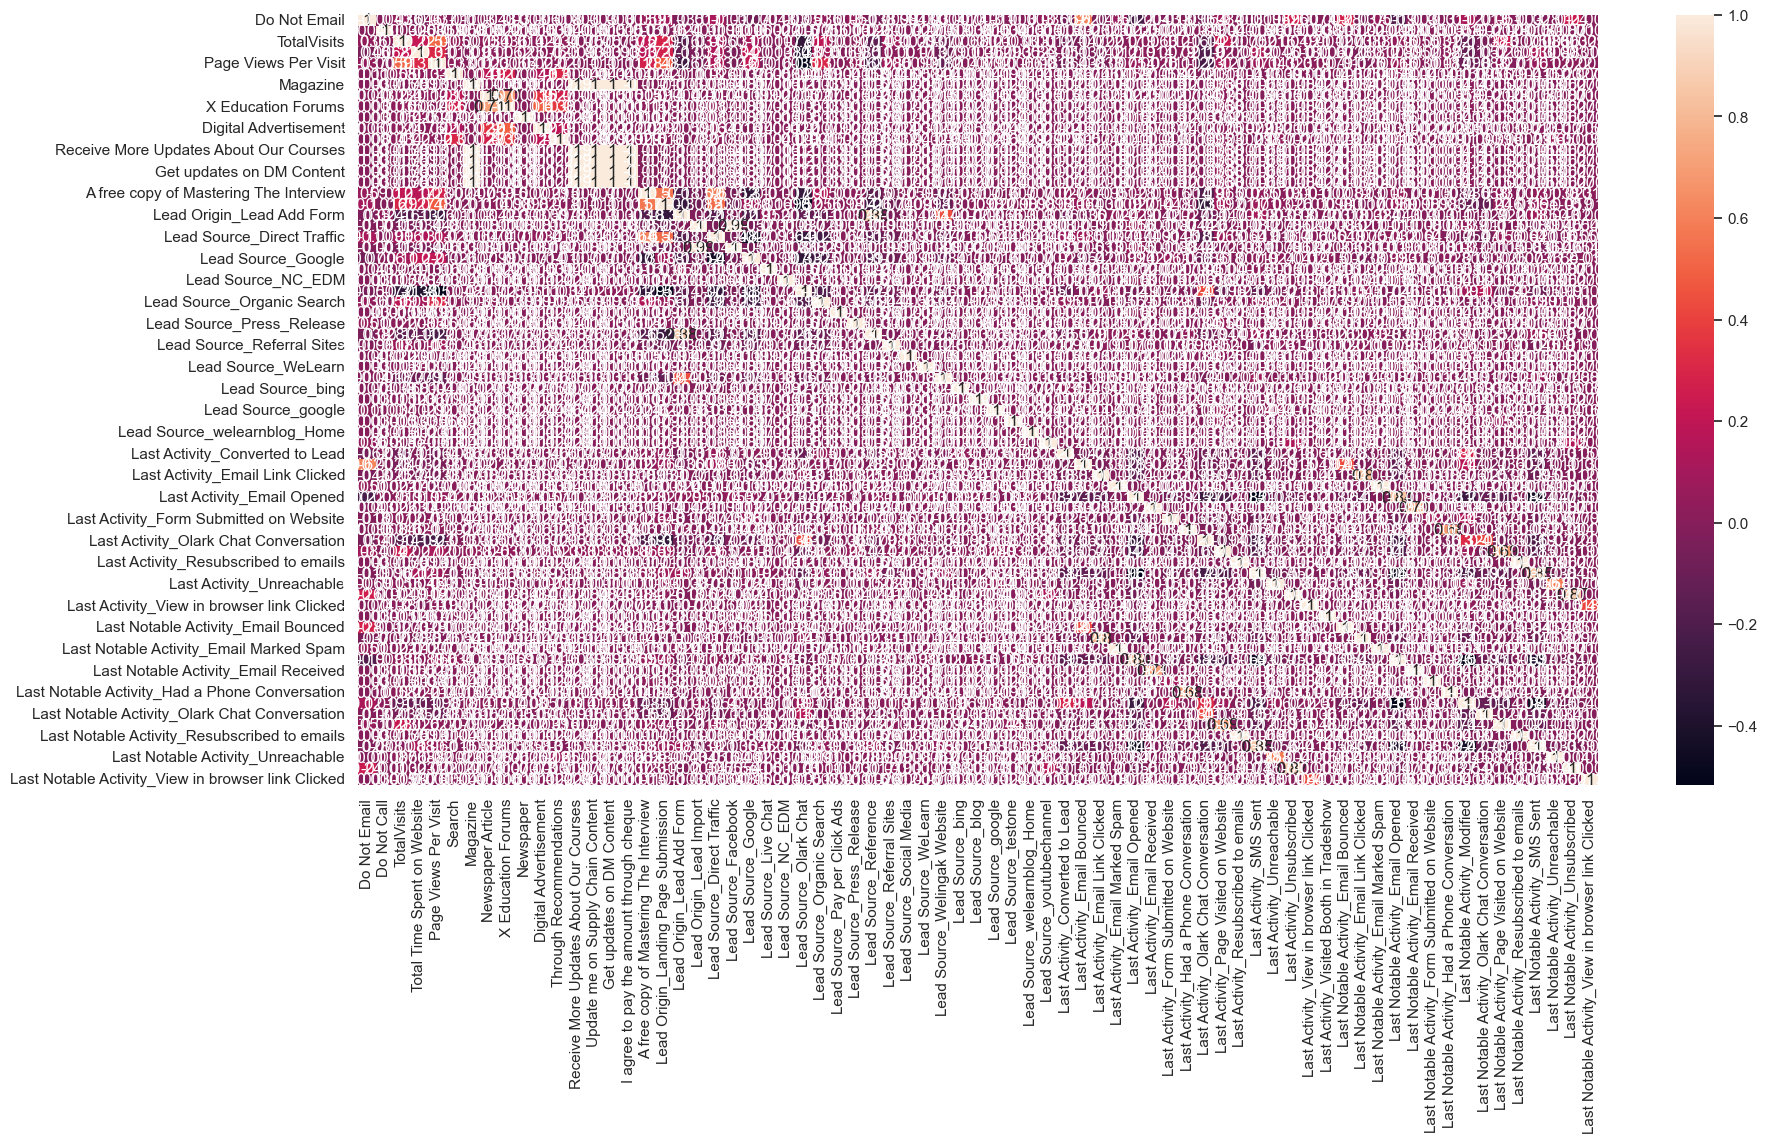

In [99]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
mul_coll_df = df.drop('Converted', axis = 1)
sns.heatmap(mul_coll_df.corr(),annot = True)
plt.show()

In [100]:
#Drop all highly correlated variables
corr_data = mul_coll_df.corr()

In [101]:
corr_data.apply(lambda x: abs(x) > 0.5)

Do Not Email  Do Not Call   
Do Not Email                                                True        False  \
Do Not Call                                                False         True   
TotalVisits                                                False        False   
Total Time Spent on Website                                False        False   
Page Views Per Visit                                       False        False   
...                                                          ...          ...   
Last Notable Activity_Resubscribed to emails               False        False   
Last Notable Activity_SMS Sent                             False        False   
Last Notable Activity_Unreachable                          False        False   
Last Notable Activity_Unsubscribed                         False        False   
Last Notable Activity_View in browser link Clicked         False        False   

                                                    TotalVisits   
Do Not Email                                              False  \
Do Not Call                                               False   
TotalVisits                                                True   
Total Time Spent on Website                               False   
Page Views Per Visit                                       True   
...                                                         ...   
Last Notable Activity_Resubscribed to emails              False   
Last Notable Activity_SMS Sent                            False   
Last Notable Activity_Unreachable                         False   
Last Notable Activity_Unsubscribed                        False   
Last Notable Activity_View in browser link Clicked        False   

                                                    Total Time Spent on Website   
Do Not Email                                                              False  \
Do Not Call                                                               False   
TotalVisits                                                               False   
Total Time Spent on Website                                                True   
Page Views Per Visit                                                      False   
...                                                                         ...   
Last Notable Activity_Resubscribed to emails                              False   
Last Notable Activity_SMS Sent                                            False   
Last Notable Activity_Unreachable                                         False   
Last Notable Activity_Unsubscribed                                        False   
Last Notable Activity_View in browser link Clicked                        False   

                                                    Page Views Per Visit   
Do Not Email                                                       False  \
Do Not Call                                                        False   
TotalVisits                                                         True   
Total Time Spent on Website                                        False   
Page Views Per Visit                                                True   
...                                                                  ...   
Last Notable Activity_Resubscribed to emails                       False   
Last Notable Activity_SMS Sent                                     False   
Last Notable Activity_Unreachable                                  False   
Last Notable Activity_Unsubscribed                                 False   
Last Notable Activity_View in browser link Clicked                 False   

                                                    Search  Magazine   
Do Not Email                                         False     False  \
Do Not Call                                          False     False   
TotalVisits                                          False     False   
Total Time Spent on Website                          False     False   
Page

Logistic Regression Model

In [102]:
bool_columns = df.select_dtypes(include='bool').columns.tolist()
 
bool_columns

['Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Live Chat',
 'Lead Source_NC_EDM',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_blog',
 'Lead Source_google',
 'Lead Source_testone',
 'Lead Source_welearnblog_Home',
 'Lead Source_youtubechannel',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Marked Spam',
 'Last Activity_Email Opened',
 'Last Activity_Email Received',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Page V

In [103]:
# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
X_train[bool_columns] = X_train[bool_columns].apply(binary_map)


In [104]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6380
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2812.2
Date:                Sun, 19 Nov 2023   Deviance:                       5624.4
Time:                        23:26:33   Pearson chi2:                 6.69e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3740
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 46.9536   1.47e+05      0.000      1.000   -2.89e+05    2.89e+05
Do Not Email                                          -1.4175      0.210     -6.756      0.000      -1.829      -1.006
Do Not Call                                           23.5357   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
TotalVisits                                            0.1462      0.041      3.530      0.000       0.065       0.227
Total Time Spent on Website                            1.1383      0.040     28.741      0.000       1.061       1.216
Page Views Per Visit                                  -0.1384      0.051     -2.722      0.006      -0.238      -0.039
Search                                                -0.1625      0.717     -0.227      0.821      -1.568       1.243
Magazine                                            1.044e-08    3.7e-05      0.000      1.000   -7.25e-05    7.25e-05
Newspaper Article                                     25.0959   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
X Education Forums                                   -51.0562   1.85e+05     -0.000      1.000   -3.63e+05    3.63e+05
Newspaper                                            -26.3053   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Digital Advertisement                                 -0.0684      1.447     -0.047      0.962      -2.904       2.767
Through Recommendations                                2.3789      1.256      1.894      0.058      -0.082       4.840
Receive More Updates About Our Courses             -5.829e-10    1.4e-05  -4.15e-05      1.000   -2.75e-05    2.75e-05
Update me on Supply Chain Content                   4.911e-09   1.62e-05      0.000      1.000   -3.18e-05    3.18e-05
Get updates on DM Content                          -5.504e-09   1.91e-05     -0.000      1.000   -3.74e-05    3.74e-05
I agree to pay the amount through cheque             3.59e-09   1.44e-05      0.000      1.000   -2.82e-05    2.82e-05
A free copy of Mastering The Interview                -0.0211      0.102     -0.207      0.836      -0.221       0.178
Lead Origin_Landing Page Submission                   -0.0722      0.101     -0.713      0.476      -0.271       0.126
Lead Origin_Lead Add Form                              1.2671      1.451      0.874      0.382      -1.576       4.110
Lead Origin_Lead Import                               24.7575   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                           -24.3553   6.76e+04     -0.000      1.000   -1.33e+05    1.33e+05
Lead Source_Facebook                                 -48.8247   1.47e+05     -0.000      1.000   -2.89e+05  

### Step 5: Feature Selection

In [105]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('Do Not Email', True, 1),
 ('Do Not Call', False, 27),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('Search', False, 41),
 ('Magazine', False, 52),
 ('Newspaper Article', False, 32),
 ('X Education Forums', False, 20),
 ('Newspaper', False, 3),
 ('Digital Advertisement', False, 26),
 ('Through Recommendations', False, 5),
 ('Receive More Updates About Our Courses', False, 54),
 ('Update me on Supply Chain Content', False, 56),
 ('Get updates on DM Content', False, 49),
 ('I agree to pay the amount through cheque', False, 50),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', False, 43),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_

In [107]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]


Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       '

In [108]:
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2863.0
Date:                Sun, 19 Nov 2023   Deviance:                       5725.9
Time:                        23:26:39   Pearson chi2:                 6.73e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3641
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3875      0.067      5.780      0.000       0.256       0.519
Do Not Email                                      -1.4504      0.190     -7.626      0.000      -1.823      -1.078
Total Time Spent on Website                        1.1429      0.039     29.286      0.000       1.066       1.219
Lead Origin_Lead Add Form                          2.8856      1.123      2.571      0.010       0.685       5.086
Lead Source_Olark Chat                             1.1680      0.100     11.720      0.000       0.973       1.363
Lead Source_Reference                              1.2534      1.139      1.100      0.271      -0.979       3.486
Lead Source_Welingak Website                       3.6243      1.511      2.398      0.016       0.662       6.587
Last Activity_Email Bounced                       -1.0628      0.346     -3.072      0.002      -1.741      -0.385
Last Activity_Had a Phone Conversation             1.0942      0.955      1.145      0.252      -0.778       2.967
Last Activity_Olark Chat Conversation             -1.2870      0.190     -6.769      0.000      -1.660      -0.914
Last Notable Activity_Email Link Clicked          -1.7390      0.247     -7.048      0.000      -2.223      -1.255
Last Notable Activity_Email Opened                -1.3305      0.084    -15.804      0.000      -1.495      -1.165
Last Notable Activity_Had a Phone Conversation    20.6582    1.2e+04      0.002      0.999   -2.35e+04    2.36e+04
Last Notable Activity_Modified                    -1.9028      0.093    -20.379      0.000      -2.086      -1.720
Last Notable Activity_Olark Chat Conversation     -1.5164      0.344     -4.407      0.000      -2.191      -0.842
Last Notable Activity_Page Visited on Website     -1.7522      0.195     -8.972      0.000      -2.135      -1.369
==================================================================================================================
"""

In [109]:
#Remove the variable with highest p value 
p_values = res.pvalues[1:]  # Exclude the constant term
column_to_remove = p_values.idxmax()
X_train = X_train.drop(column_to_remove, axis=1)

In [110]:
#Train the model again and check p values 
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.3
Date:                Sun, 19 Nov 2023   Deviance:                       5728.5
Time:                        23:26:40   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3638
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3914      0.067      5.843      0.000       0.260       0.523
Do Not Email                                     -1.4546      0.190     -7.652      0.000      -1.827      -1.082
Total Time Spent on Website                       1.1422      0.039     29.274      0.000       1.066       1.219
Lead Origin_Lead Add Form                         2.8842      1.123      2.569      0.010       0.684       5.084
Lead Source_Olark Chat                            1.1668      0.100     11.707      0.000       0.971       1.362
Lead Source_Reference                             1.2520      1.139      1.099      0.272      -0.981       3.485
Lead Source_Welingak Website                      3.6268      1.511      2.400      0.016       0.664       6.589
Last Activity_Email Bounced                      -1.0588      0.346     -3.061      0.002      -1.737      -0.381
Last Activity_Had a Phone Conversation            1.9389      0.780      2.487      0.013       0.411       3.467
Last Activity_Olark Chat Conversation            -1.2831      0.190     -6.749      0.000      -1.656      -0.911
Last Notable Activity_Email Link Clicked         -1.7425      0.247     -7.063      0.000      -2.226      -1.259
Last Notable Activity_Email Opened               -1.3340      0.084    -15.852      0.000      -1.499      -1.169
Last Notable Activity_Modified                   -1.9100      0.093    -20.479      0.000      -2.093      -1.727
Last Notable Activity_Olark Chat Conversation    -1.5233      0.344     -4.427      0.000      -2.198      -0.849
Last Notable Activity_Page Visited on Website    -1.7555      0.195     -8.990      0.000      -2.138      -1.373
=================================================================================================================
"""

In [111]:
#Repeat the same again
#Remove the variable with highest p value 
p_values = res.pvalues[1:]  # Exclude the constant term
column_to_remove = p_values.idxmax()
X_train = X_train.drop(column_to_remove, axis=1)

In [112]:
#Train the model again and check p values 
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.7
Date:                Sun, 19 Nov 2023   Deviance:                       5729.5
Time:                        23:26:42   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3637
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3914      0.067      5.843      0.000       0.260       0.523
Do Not Email                                     -1.4537      0.190     -7.652      0.000      -1.826      -1.081
Total Time Spent on Website                       1.1419      0.039     29.269      0.000       1.065       1.218
Lead Origin_Lead Add Form                         4.1102      0.203     20.210      0.000       3.712       4.509
Lead Source_Olark Chat                            1.1659      0.100     11.696      0.000       0.971       1.361
Lead Source_Welingak Website                      2.3996      1.030      2.329      0.020       0.380       4.419
Last Activity_Email Bounced                      -1.0592      0.346     -3.063      0.002      -1.737      -0.381
Last Activity_Had a Phone Conversation            1.9389      0.779      2.488      0.013       0.412       3.466
Last Activity_Olark Chat Conversation            -1.2842      0.190     -6.756      0.000      -1.657      -0.912
Last Notable Activity_Email Link Clicked         -1.7406      0.246     -7.062      0.000      -2.224      -1.257
Last Notable Activity_Email Opened               -1.3346      0.084    -15.858      0.000      -1.500      -1.170
Last Notable Activity_Modified                   -1.9084      0.093    -20.473      0.000      -2.091      -1.726
Last Notable Activity_Olark Chat Conversation    -1.5210      0.344     -4.422      0.000      -2.195      -0.847
Last Notable Activity_Page Visited on Website    -1.7568      0.195     -8.991      0.000      -2.140      -1.374
=================================================================================================================
"""

This looks good. All variables have a p value of less than 0.05 (95% Confidence Interval)

In [113]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5310    0.393430
2181    0.192620
8215    0.064802
8887    0.458857
7920    0.172488
4947    0.736417
3073    0.520828
2722    0.718716
499     0.200176
8330    0.374430
dtype: float64

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Pred':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Pred
5310          0        0.393430
2181          0        0.192620
8215          0        0.064802
8887          0        0.458857
7920          0        0.172488

Creating new column 'predicted' with 1 if Converted_pred > 0.5 else 0

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Pred.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Pred  predicted
5310          0        0.393430          0
2181          0        0.192620          0
8215          0        0.064802          0
8887          0        0.458857          0
7920          0        0.172488          0

In [118]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3392  508]
 [ 797 1745]]


In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7974231605091586


Checking VIFs

In [121]:
X_train

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form   
5310             0                    -0.721902                          0  \
2181             0                    -0.429014                          0   
8215             0                    -0.905639                          0   
8887             0                    -0.487228                          0   
7920             0                    -0.547261                          0   
...            ...                          ...                        ...   
350              0                    -0.905639                          1   
79               0                     0.376883                          1   
8070             0                    -0.905639                          1   
6963             0                     1.020873                          0   
5664             0                     1.990496                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website   
5310                       0                             0  \
2181                       0                             0   
8215                       1                             0   
8887                       0                             0   
7920                       0                             0   
...                      ...                           ...   
350                        0                             0   
79                         0                             0   
8070                       0                             0   
6963                       0                             0   
5664                       0                             0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation   
5310                            0                                       0  \
2181                            0                                       0   
8215                            0                                       0   
8887                            0                                       0   
7920                            0                                       0   
...                           ...                                     ...   
350                             0                                       0   
79                              0                                       0   
8070                            0                                       0   
6963                            0                                       0   
5664                            0                                       0   

      Last Activity_Olark Chat Conversation   
5310                                      0  \
2181                                      0   
8215                                      1   
8887                                      0   
7920                                      0   
...                                     ...   
350                                       0   
79                                        0   
8070                                      0   
6963                                      0   
5664                                      0   

      Last Notable Activity_Email Link Clicked   
5310                                         0  \
2181                                         0   
8215                                         0   
8887                                         0   
7920                                         0   
...                                        ...   
350                                          0   
79                                           0   
8070                                         0   
6963                                         0   
5664                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified   
5310                                   0                               0  \
2181                                   1                               0   
8215 

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7           Last Activity_Olark Chat Conversation  1.93
0                                    Do Not Email  1.81
5                     Last Activity_Email Bounced  1.79
3                          Lead Source_Olark Chat  1.65
10                 Last Notable Activity_Modified  1.53
2                       Lead Origin_Lead Add Form  1.35
11  Last Notable Activity_Olark Chat Conversation  1.33
4                    Lead Source_Welingak Website  1.26
1                     Total Time Spent on Website  1.18
9              Last Notable Activity_Email Opened  1.09
8        Last Notable Activity_Email Link Clicked  1.02
12  Last Notable Activity_Page Visited on Website  1.02
6          Last Activity_Had a Phone Conversation  1.00

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Step 6: Model Evaluation

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6864673485444532

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.8697435897435898

In [126]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13025641025641024


In [127]:
# positive predictive value 
print (TP / float(TP+FP))

0.7745228584110075


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))


0.8097397947004058


Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Pred, drop_intermediate = False )


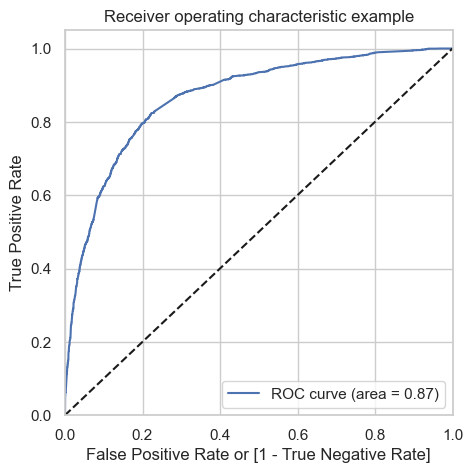

In [133]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)


Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Pred  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6   
5310          0        0.393430          0    1    1    1    1    0    0    0  \
2181          0        0.192620          0    1    1    0    0    0    0    0   
8215          0        0.064802          0    1    0    0    0    0    0    0   
8887          0        0.458857          0    1    1    1    1    1    0    0   
7920          0        0.172488          0    1    1    0    0    0    0    0   

      0.7  0.8  0.9  
5310    0    0    0  
2181    0    0    0  
8215    0    0    0  
8887    0    0    0  
7920    0    0    0

In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394598  1.000000  0.000000
0.1   0.1  0.566594  0.971676  0.302564
0.2   0.2  0.717945  0.914634  0.589744
0.3   0.3  0.775846  0.866640  0.716667
0.4   0.4  0.800373  0.773013  0.818205
0.5   0.5  0.797423  0.686467  0.869744
0.6   0.6  0.788885  0.604249  0.909231
0.7   0.7  0.757529  0.469315  0.945385
0.8   0.8  0.734089  0.378049  0.966154
0.9   0.9  0.678206  0.203777  0.987436


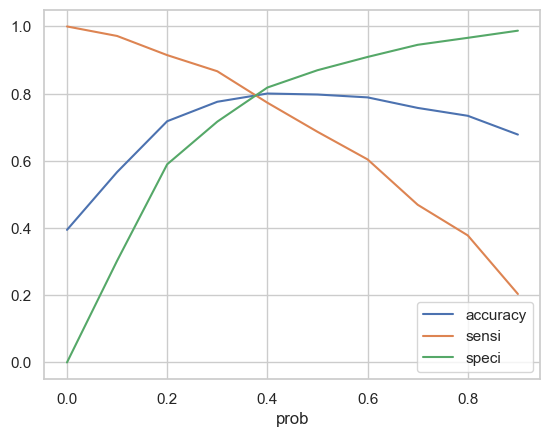

In [136]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [137]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Pred.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Converted_Pred  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6   
5310          0        0.393430          0    1    1    1    1    0    0    0  \
2181          0        0.192620          0    1    1    0    0    0    0    0   
8215          0        0.064802          0    1    0    0    0    0    0    0   
8887          0        0.458857          0    1    1    1    1    1    0    0   
7920          0        0.172488          0    1    1    0    0    0    0    0   

      0.7  0.8  0.9  final_predicted  
5310    0    0    0                1  
2181    0    0    0                0  
8215    0    0    0                0  
8887    0    0    0                1  
7920    0    0    0                0

In [138]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7949394597950947

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3058,  842],
       [ 479, 2063]])

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8115656963021243

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.7841025641025641

In [144]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2158974358974359


In [145]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7101549053356282


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8645744981622844


### Step 7: Predictions on Test Set and final Model evaluation

In [147]:
X_test[numeric[1:]] = scaler.transform(X_test[numeric[1:]])

In [ ]:
selected_cols = X_train.columns

In [151]:
X_test = X_test[selected_cols]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form   
2400             0                     0.846232                      False  \
849              0                    -0.781935                      False   
7459             0                    -0.663688                      False   
6184             1                     0.060346                      False   
4869             0                     1.497498                      False   

      Lead Source_Olark Chat  Lead Source_Welingak Website   
2400                   False                         False  \
849                    False                         False   
7459                   False                         False   
6184                   False                         False   
4869                   False                         False   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation   
2400                        False                                   False  \
849                         False                                   False   
7459                        False                                   False   
6184                        False                                   False   
4869                        False                                   False   

      Last Activity_Olark Chat Conversation   
2400                                  False  \
849                                    True   
7459                                  False   
6184                                  False   
4869                                  False   

      Last Notable Activity_Email Link Clicked   
2400                                     False  \
849                                      False   
7459                                     False   
6184                                     False   
4869                                     False   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified   
2400                               False                           False  \
849                                False                            True   
7459                                True                           False   
6184                               False                            True   
4869                                True                           False   

      Last Notable Activity_Olark Chat Conversation   
2400                                          False  \
849                                           False   
7459                                          False   
6184                                          False   
4869                                          False   

      Last Notable Activity_Page Visited on Website  
2400                                          False  
849                                           False  
7459                                          False  
6184                                          False  
4869                                          False

In [152]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2762 entries, 2400 to 6153
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   const                                          2762 non-null   float64
 1   Do Not Email                                   2762 non-null   int64  
 2   Total Time Spent on Website                    2762 non-null   float64
 3   Lead Origin_Lead Add Form                      2762 non-null   bool   
 4   Lead Source_Olark Chat                         2762 non-null   bool   
 5   Lead Source_Welingak Website                   2762 non-null   bool   
 6   Last Activity_Email Bounced                    2762 non-null   bool   
 7   Last Activity_Had a Phone Conversation         2762 non-null   bool   
 8   Last Activity_Olark Chat Conversation          2762 non-null   bool   
 9   Last Notable Activity_Email Link Clicked       2762 no

In [153]:
#Convert bool variables into numeric
# List of variables to map

bool_columns = X_test.select_dtypes(include='bool').columns.tolist()

# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
X_test_sm[bool_columns] = X_test_sm[bool_columns].apply(binary_map)

In [154]:
#Make predictions on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2400    0.795389
849     0.024267
7459    0.154329
6184    0.052066
4869    0.682827
2519    0.920285
5419    0.166350
2103    0.493836
3987    0.064802
3512    0.064802
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

0
2400  0.795389
849   0.024267
7459  0.154329
6184  0.052066
4869  0.682827

In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted         0
0          1  0.795389
1          0  0.024267
2          0  0.154329
3          1  0.052066
4          1  0.682827

In [158]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Churn_Prob
0          1    0.795389
1          0    0.024267
2          0    0.154329
3          1    0.052066
4          1    0.682827

In [159]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

Converted  Churn_Prob  final_predicted
0          1    0.795389                1
1          0    0.024267                0
2          0    0.154329                0
3          1    0.052066                0
4          1    0.682827                1

In [160]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7932657494569153

In [161]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1388,  384],
       [ 187,  803]])

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8111111111111111

In [164]:

# Let us calculate specificity
TN / float(TN+FP)

0.7832957110609481